In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib
#import anvil.server
import math
import warnings
#anvil.server.connect("MULC3WA3OE5ETI6GT6HMSZRI-ZKH2WPDHB453YQOY")
warnings.filterwarnings("ignore") # ignore warning
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',1000)
pd.set_option("display.max_colwidth", None)

In [2]:
! pip install anvil-uplink
#! pip install anvil
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 87 kB 2.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 51 kB 120 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=0a35cfaff2c3de015d4f41931b6523b88009d2393b62d07c72db9bb9c0b616da
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


Saving kaggle.json to kaggle.json
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           7327        219  1.0              
madhurpant/world-deaths-and-causes-1990-2019                    World Deaths and Causes (1990 - 2019)               442KB  2022-11-29 07:09:27           1402         35  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           4759        106  1.0              
thedevastator/how-much-sle

In [3]:
import anvil.server
anvil.server.connect("MULC3WA3OE5ETI6GT6HMSZRI-ZKH2WPDHB453YQOY")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [4]:
!kaggle datasets list -s"YouTube Trending Video Dataset (updated daily)"
!kaggle datasets download -d "rsrishav/youtube-trending-video-dataset" -p "/content/new_data"

ref                                                          title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rsrishav/youtube-trending-video-dataset                      YouTube Trending Video Dataset (updated daily)    1GB  2022-12-10 12:33:35          16027        392  1.0              
datasnaek/youtube                                            Trending YouTube Video Statistics and Comments   56MB  2017-10-25 19:26:15          19699        324  0.7647059        
syahrulhamdani/indonesias-trending-youtube-video-statistics  Indonesia's Trending YouTube Video Statistics    74MB  2022-12-10 06:00:58           1535         60  1.0              
jessevent/all-kaggle-datasets                                Complete Kaggle Datasets Collectio

In [5]:
#filepath1="new_data/US_category_id.json"
filepath1 = ""
filepath2 = ""
from zipfile import ZipFile
with ZipFile(r"/content/new_data/youtube-trending-video-dataset.zip") as myzip:
    filepath1 = myzip.open("US_category_id.json")
    filepath2 = myzip.open("US_youtube_trending_data.csv")

category_id_df = pd.read_json(filepath1)
#category_id_df

In [6]:
#filepath2="new_data/US_youtube_trending_data.csv"
videos_df = pd.read_csv(filepath2,header='infer')
#videos_df.head()

In [7]:
def clean_video_csv(video_df,country_code):
    """
    This function is to remove unnecessary chars like '"',',','\r'which will cause errors when copy csv files into staging table.
    
    Parameters:
    video_df: Dataframe from read_csv file
    filepath: videos csv filepath
    
    Return:
    video_df: Dataframe which remove unnecessary chars
    """
    video_df["tags"] = video_df["tags"].apply(lambda x:x.replace('"',""))
    video_df["title"] = video_df["title"].apply(lambda x:x.replace(',',' '))
    video_df["channelTitle"] = video_df["channelTitle"].apply(lambda x:x.replace(',',' '))
    video_df["description"] = video_df["description"].apply(lambda x:str(x).replace('\r',''))
    video_df["description"] = video_df["description"].apply(lambda x:str(x).replace(',',' '))
    video_df["description"] = video_df["description"].apply(lambda x:str(x).replace('"',''))
    video_df["country"] = country_code
    return video_df
#Clean videos csv files for selected country code
country_code='US'
"""
for c in country_code:
    filepath= "new_data/"+c+"_youtube_trending_data.csv"
    video_df = pd.read_csv(filepath,header='infer')
    savepath = "new_data/"+c+"cleaned_data.csv"
    video_df = clean_video_csv(video_df,c)
    video_df.to_csv(savepath,index=False)
"""
#filepath= "new_data/"+c+"_youtube_trending_data.csv"
#$video_df = pd.read_csv(filepath,header='infer')
savepath = "new_data/"+country_code+"cleaned_data.csv"
video_df = clean_video_csv(videos_df,country_code)
video_df.to_csv(savepath,index=False)

In [8]:
def category_extract (df,country_code):
    """
    The function is to extract category id and category title from category_id json files
    
    Parameters:
    df: Dataframe of read_json file
    filepath: category_id json filepath
    
    Return:
    category_df: Dataframe with columns: category_id,category_title,category_filename,country_code
    
    """
    category_id = []
    category_title = []
    for i in range(df.shape[0]):
        category_id.append(df.iloc[i]["items"]['id'])
        category_title.append(df.iloc[i]["items"]["snippet"]["title"])
    category_df = pd.DataFrame()
    category_df["category_id"] = category_id
    category_df["category_title"] = category_title
    category_df.insert(category_df.shape[1],"country_code",country_code)
    return category_df

#Extract category title and id from json file of each country

"""
category_all = pd.DataFrame()
for c in country_code:
    filepath="new_data/"+c+"_category_id.json"
    category_id_df = pd.read_json(filepath)
    category_all = pd.concat([category_all,category_extract(category_id_df,c)])
    
#category_all.tail()
savepath = "new_data/category_all.csv"
category_all.to_csv(savepath,index=False)
"""
category_all = pd.DataFrame()
category_all = pd.concat([category_all,category_extract(category_id_df,country_code)])
savepath = "new_data/category_all.csv"
category_all.to_csv(savepath,index=False)

In [9]:
US = pd.read_csv("new_data/UScleaned_data.csv")
#US.head()

In [10]:
category = pd.read_csv("new_data/category_all.csv")

In [11]:
trendingdate_df = US.groupby("video_id").trending_date.describe().reset_index()
trendingdate_df

video_id count unique                   top freq
0      --14w5SOEUs    10      5  2021-06-11T00:00:00Z    2
1      --2O86Z0hsM     4      4  2022-03-11T00:00:00Z    1
2      --40TEbZ9Is     5      5  2021-09-21T00:00:00Z    1
3      --DKkzWVh-E     4      4  2021-12-08T00:00:00Z    1
4      --FmExEAsM8     4      4  2021-12-02T00:00:00Z    1
...            ...   ...    ...                   ...  ...
31526  zzCrFWjKPy8     5      5  2022-08-30T00:00:00Z    1
31527  zzd4ydafGR0    10     10  2021-02-12T00:00:00Z    1
31528  zziBybeSAtw     2      2  2021-01-17T00:00:00Z    1
31529  zzk09ESX7e0    14      7  2021-06-03T00:00:00Z    2
31530  zzsIqPVv2Q4     5      5  2022-05-01T00:00:00Z    1

[31531 rows x 5 columns]

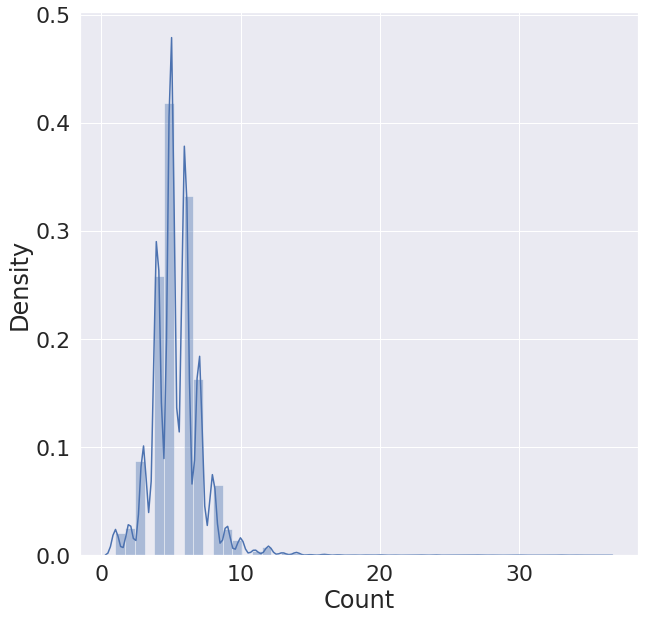

In [12]:
pd.DataFrame(trendingdate_df["count"].astype('int').copy()).describe()
matplotlib.pyplot.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.distplot(trendingdate_df["count"])
matplotlib.pyplot.xlabel('Count');
matplotlib.pyplot.ylabel('Density');

In [13]:
trendingdate_df["count"].mean()

5.422917129174463

In [14]:
videos_df.categoryId.nunique()
#videos_df.head()

15

In [15]:
videos_df[videos_df["view_count"].idxmax():videos_df["view_count"].idxmax()+1]

video_id                         title           publishedAt  \
152788  gQlMMD8auMs  BLACKPINK - ‚ÄòPink Venom‚Äô M/V  2022-08-19T04:00:13Z   

                       channelId channelTitle  categoryId  \
152788  UCOmHUn--16B90oW2L6FRR3A    BLACKPINK          10   

               trending_date  \
152788  2022-09-10T00:00:00Z   

                                                                                                                                                                                                         tags  \
152788  YG Entertainment|YG|ÏôÄÏù¥ÏßÄ|K-pop|BLACKPINK|Î∏îÎûôÌïëÌÅ¨|Î∏îÌïë|Ï†úÎãà|Î°úÏ†ú|Î¶¨ÏÇ¨|ÏßÄÏàò|LISA|JISOO|JENNIE|ROS√â|BLINK|Î∏îÎßÅÌÅ¨|BLACKPINK PINK VENOM|PINK VENOM|ÌïëÌÅ¨Î≤†ÎÜà|Î∏îÎûôÌïëÌÅ¨ ÌïëÌÅ¨Î≤†ÎÜà|BLACKPINK ÌïëÌÅ¨Î≤†ÎÜà|BORN PINK|BLACKPINK BORN PINK|Î≥∏ÌïëÌÅ¨|Î∏îÎûôÌïëÌÅ¨ Î≥∏ÌïëÌÅ¨   

        view_count     likes  dislikes  comment_count  \
152788   277791741  12993894         0        3534337   

                                        thumbnail_link  comments_disabled  \
152788  https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg              False   

        ratings_disabled  \
152788             False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
152788  BLACKPINK - ‚ÄòPink Venom‚Äô M/VKick in the door Waving the coco ÌåùÏΩòÏù¥ÎÇò Ï±ôÍ≤® Íª¥Îì§ ÏÉùÍ∞Å ÎßêÍ≥†I talk that talk Runways I walk walk Îàà Í∞êÍ≥† pop pop Ïïà Î¥êÎèÑ Ï≤ô One by one then Two by twoÎÇ¥ ÏÜêÎÅù Ìà≠ ÌïòÎÇòÏóê Îã§ Î¨¥ÎÑàÏßÄÎäî Ï§ëÍ∞ÄÏßú Ïáº ÏπòÍ≥§ ÌôîÎ†§ÌñàÏßÄMakes no sense You couldn‚Äôt get a dollar outta meÏûê Ïò§Îäò Î∞§Ïù¥Ïïº ÎÇú ÎèÖÏùÑ ÌíàÏùÄ ÍΩÉÎÑ§ ÌòºÏùÑ ÎπºÏïóÏùÄ Îã§Ïùå Look what you made us do Ï≤úÏ≤úÌûà ÎÑê Ïû†Ïû¨Ïö∏ FIRE ÏûîÏù∏Ìï† ÎßåÌÅº ÏïÑÎ¶ÑÎã§Ïõå I bring the pain like This that pink venomThis t

In [16]:
corrolation_list = ['view_count', 'likes', 'dislikes', 'comment_count']
hm_data = videos_df[corrolation_list].corr() 
display(hm_data)

view_count     likes  dislikes  comment_count
view_count       1.000000  0.857948  0.545761       0.603265
likes            0.857948  1.000000  0.524895       0.742890
dislikes         0.545761  0.524895  1.000000       0.439101
comment_count    0.603265  0.742890  0.439101       1.000000

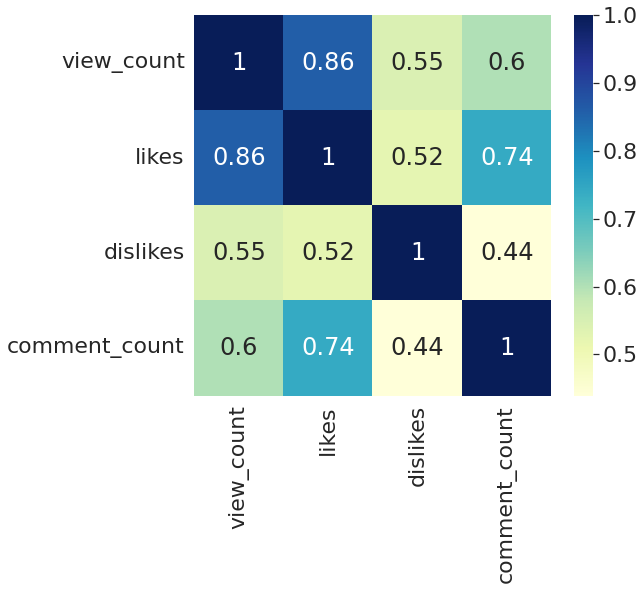

In [17]:
matplotlib.pyplot.figure(figsize=(8,7))
sns.set(font_scale=2)
sns.heatmap(hm_data,cmap="YlGnBu", annot=True);

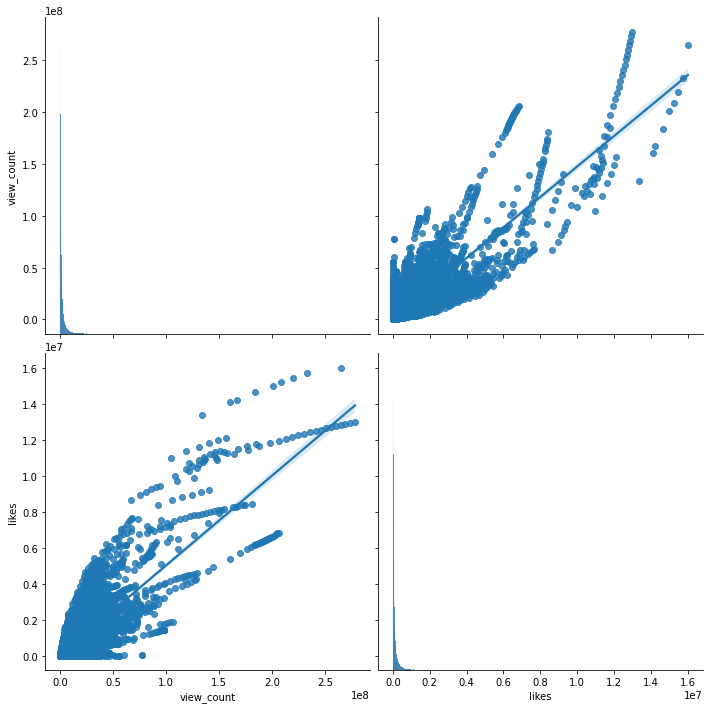

In [ ]:
sns.pairplot(videos_df[['view_count', 'likes']], kind='reg',height=5);

Text(0.5, 1.0, 'Correlation of Likes count and View count')

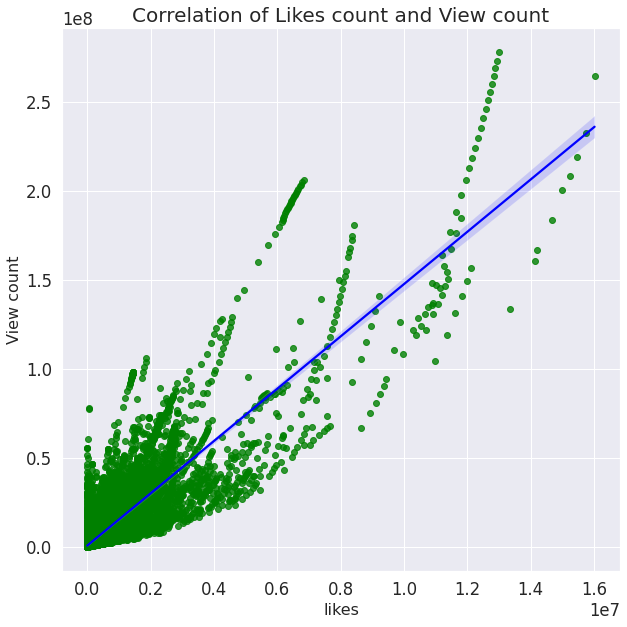

In [18]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.regplot(x=videos_df['likes'], y=videos_df['view_count'],scatter_kws={"color": "green"}, line_kws={"color": "blue"})
matplotlib.pyplot.xlabel('likes', fontsize=16);
matplotlib.pyplot.ylabel('View count', fontsize=16);
matplotlib.pyplot.title('Correlation of Likes count and View count', fontsize=20)

Text(0.5, 1.0, 'Correlation of Dislikes count and View count')

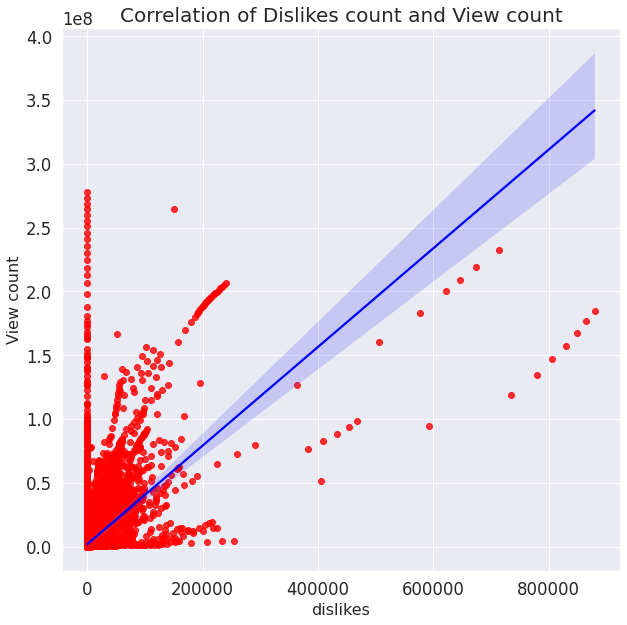

In [19]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.regplot(x=videos_df['dislikes'], y=videos_df['view_count'],scatter_kws={"color": "red"}, line_kws={"color": "blue"}).set(title='correlation of dislikes count and views')
matplotlib.pyplot.xlabel('dislikes', fontsize=16);
matplotlib.pyplot.ylabel('View count', fontsize=16);
matplotlib.pyplot.title('Correlation of Dislikes count and View count', fontsize=20)

Text(0.5, 1.0, 'Correlation of Comment count and View count')

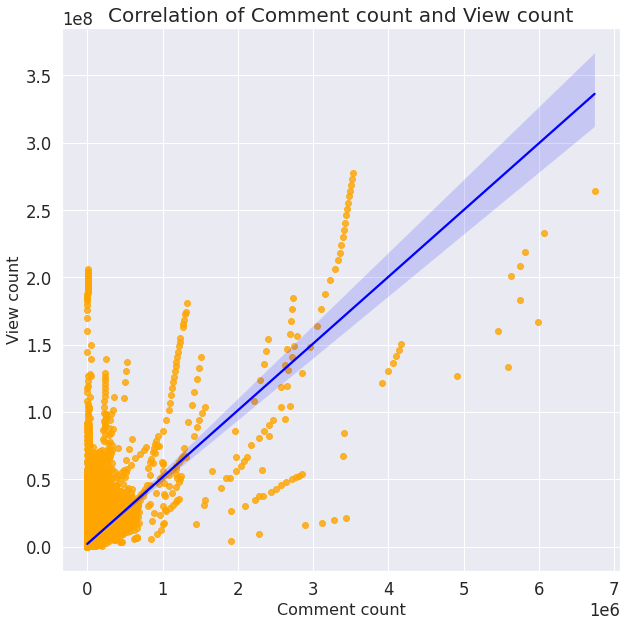

In [20]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.regplot(x=videos_df['comment_count'], y=videos_df['view_count'],scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
matplotlib.pyplot.xlabel('Comment count', fontsize=16);
matplotlib.pyplot.ylabel('View count', fontsize=16);
matplotlib.pyplot.title('Correlation of Comment count and View count', fontsize=20)

In [22]:
US1 =US.merge(category,how="inner",left_on=["categoryId","country"],right_on=["category_id","country_code"])
#US1.info()
US1

video_id  \
0       3C66w5Z0ixs   
1       49Z6Mv4_WCA   
2       nt3VVyv5pxQ   
3       BNeDH6UTmXw   
4       gPdUslndvVI   
...             ...   
170985  F-kvFACZ5yE   
170986  F-kvFACZ5yE   
170987  F-kvFACZ5yE   
170988  F-kvFACZ5yE   
170989  F-kvFACZ5yE   

                                                                                           title  \
0                                                             I ASKED HER TO BE MY GIRLFRIEND...   
1                                                             i don't know what im doing anymore   
2                                                                 Try Not To Laugh Challenge #51   
3                                                           Ten Minutes with Tyler Cameron | Q&A   
4                                                                        Our Farm Got Destroyed.   
...                                                                                          ...   
170985  Denzel Washington Reveals the Aftermath of Will Smith‚Äôs Slap at the Oscars to T.D. Jakes   
170986  Denzel Washington Reveals the Aftermath of Will Smith‚Äôs Slap at the Oscars to T.D. Jakes   
170987  Denzel Washington Reveals the Aftermath of Will Smith‚Äôs Slap at the Oscars to T.D. Jakes   
170988  Denzel Washington Reveals the Aftermath of Will Smith‚Äôs Slap at the Oscars to T.D. Jakes   
170989  Denzel Washington Reveals the Aftermath of Will Smith‚Äôs Slap at the Oscars to T.D. Jakes   

                 publishedAt                 channelId       channelTitle  \
0       2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg           Brawadis   
1       2020-08-11T20:24:34Z  UCtinbF-Q-fVthA0qrFQTgXQ       CaseyNeistat   
2       2020-08-11T17:00:31Z  UCYJPby9DRCteedh5tfxVbrw          Smosh Pit   
3       2020-08-11T22:00:05Z  UCMw7m-ScQ6jV1FQzQnn1y8Q      Tyler Cameron   
4       2020-08-11T23:00:06Z  UCuxlXCfVyV-i5YLL30jkomw  Cole The Cornstar   
...                      ...                       ...                ...   
170985  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw         T.D. Jakes   
170986  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw         T.D. Jakes   
170987  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw         T.D. Jakes   
170988  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw         T.D. Jakes   
170989  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw         T.D. Jakes   

        categoryId         trending_date  \
0               22  2020-08-12T00:00:00Z   
1               22  2020-08-12T00:00:00Z   
2               22  2020-08-12T00:00:00Z   
3               22  2020-08-12T00:00:00Z   
4               22  2020-08-12T00:00:00Z   
...            ...                   ...   
170985          29  2022-04-26T00:00:00Z   
170986          29  2022-04-27T00:00:00Z   
170987          29  2022-04-29T00:00:00Z   
170988          29  2022-04-30T00:00:00Z   
170989          29  2022-05-04T00:00:00Z   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 tags  \
0                                                                                                                                                                                                                                                                                                                                     brawadis|prank|basketball|skits|ghost|funny videos|vlog|vlogging|NBA|browadis|challenges|bmw i8|faze rug|faze rug brother|mama rug and papa rug   
1                                                                                                                          

Text(0.5, 1.0, 'Rank of Number of Video of Top 10 Channel')

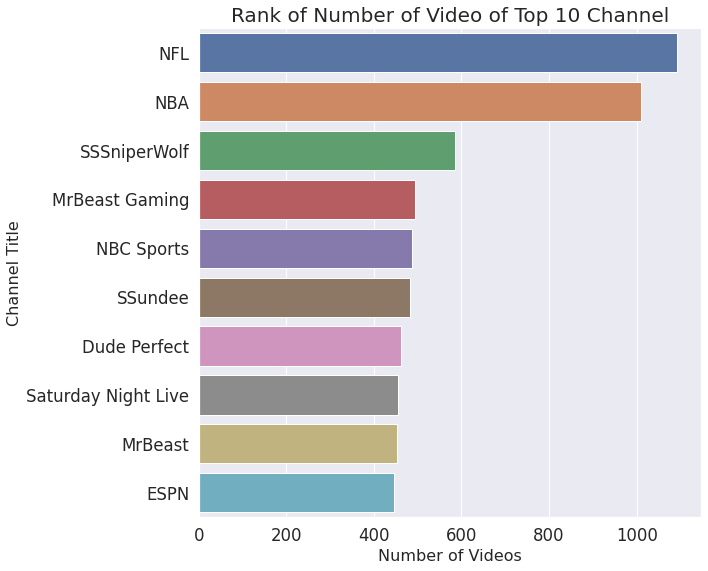

In [24]:
l=US1.channelTitle.value_counts()[:10].index
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':US1.channelTitle.value_counts()[:10]})
video_count.index=[i for i in range(1,11)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.set(font_scale=1.5)
sns.barplot(y="channel_title",x="no_of_videos",data = video_count)
matplotlib.pyplot.xlabel('Number of Videos', fontsize=16);
matplotlib.pyplot.ylabel('Channel Title', fontsize=16);
matplotlib.pyplot.title('Rank of Number of Video of Top 10 Channel', fontsize=20)

In [25]:
print(len(US1.category_title.value_counts()))

15


Text(0.5, 1.0, 'Rank of Number of Video of Category')

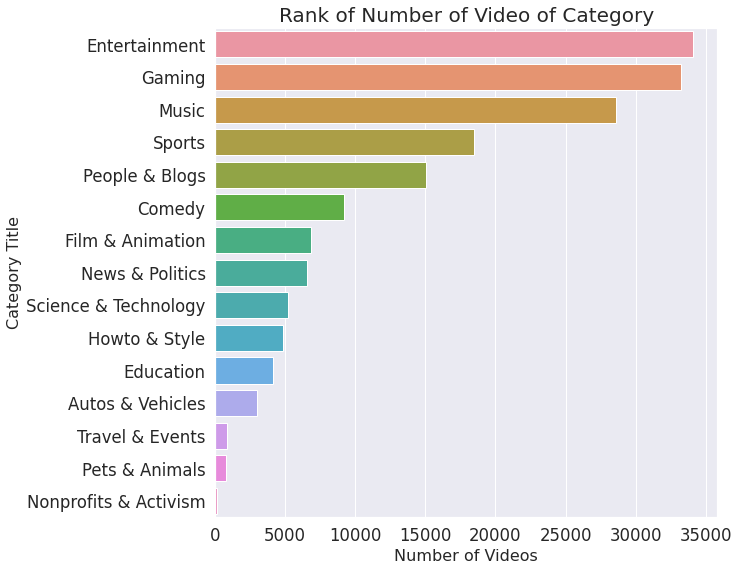

In [26]:
l=US1.category_title.value_counts()[:15].index
video_count = pd.DataFrame({'category_title':l,'no_of_videos':US1.category_title.value_counts()[:15]})
video_count.index=[i for i in range(1,16)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.set(font_scale=1.5)
sns.barplot(x="no_of_videos",y="category_title",data = video_count)
matplotlib.pyplot.xlabel('Number of Videos', fontsize=16);
matplotlib.pyplot.ylabel('Category Title', fontsize=16);
matplotlib.pyplot.title('Rank of Number of Video of Category', fontsize=20)

In [27]:
US1['Views in million'] = US1['view_count'] / 1000000
l=US1[['category_title','Views in million']].groupby('category_title')\
.agg(['mean','count'])\
.sort_values(by=('Views in million','count'), ascending=False)[:15].index
f=pd.DataFrame(US1[['category_title','Views in million']].groupby('category_title')\
.agg(['mean','count'])\
.sort_values(by=('Views in million','count'), ascending=False)[:15])
f["category_title"]=l
f.index=[i for i in range(1,16)]
f.columns
f=f[[('category_title',      ''),(    'Views in million',  'mean'),(    'Views in million', 'count')]]
cm = sns.light_palette("#a275ac", as_cmap=True)

f.style.background_gradient(cmap=cm).set_precision(2).highlight_null('red')


In [28]:
US1["trending_year"]=pd.DatetimeIndex(US1['trending_date']).year
US1["trendingDate"]=pd.DatetimeIndex(US1['trending_date']).date

In [30]:
#print(US1["trendingDate"][:5])
US1["trendingDate"]=pd.to_datetime(US1["trendingDate"],format = "%Y.%m.%d")
US1["publish_date"]=pd.to_datetime(US1["publishedAt"]).dt.date


US1["published_hours"]=pd.to_datetime(US1["publishedAt"]).dt.hour
#print(US1["published_hours"][:5])
US1["publish_date"]=pd.to_datetime(US1["publish_date"],format = "%Y/%m/%d")
l=[]
for i in US1["publish_date"]:
    l.append(i.day_name())
US1["publish_day"]= l

Text(0.5, 1.0, 'Total daily video releases (Since Aug. 2020 to present)')

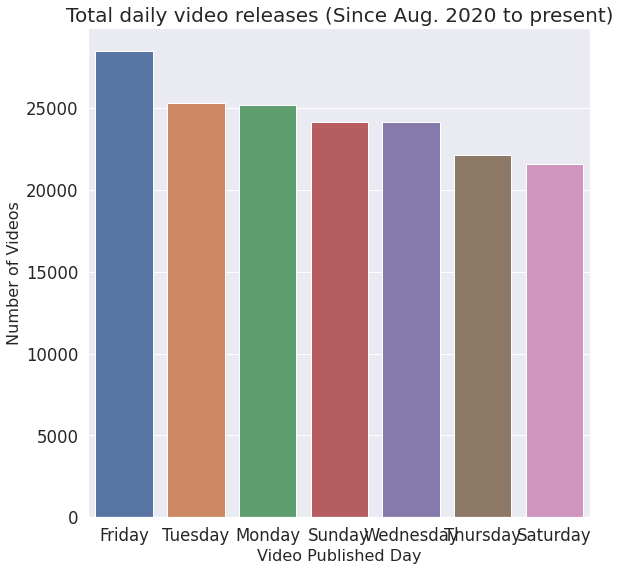

In [32]:
x=US1["publish_day"].value_counts()
#print(x.index)
published_day=pd.DataFrame({"publish_day":x.index,"no_of_videos":x})
published_day.index=[i for i in range(0,7)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="publish_day",y="no_of_videos",data=published_day)
matplotlib.pyplot.xlabel('Video Published Day', fontsize=16);
matplotlib.pyplot.ylabel('Number of Videos', fontsize=16);
matplotlib.pyplot.title('Total daily video releases (Since Aug. 2020 to present)', fontsize=20)

Text(0.5, 1.0, 'Total Hourly video releases (Since Aug. 2020 to present)')

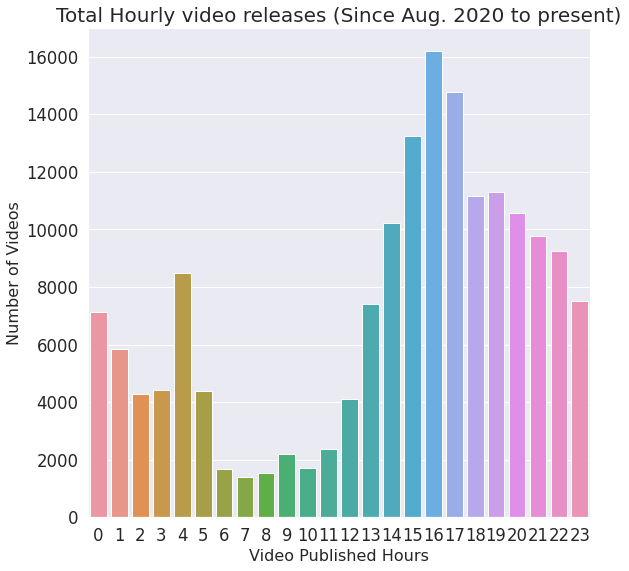

In [33]:
c=US1["published_hours"].value_counts()
hours=pd.DataFrame({"published_hours":c.index,"numb_of_videos":c})
hours.index=[i for i in range(0,24)]
hours=hours.sort_values("published_hours")
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="published_hours",y="numb_of_videos",data=hours)
matplotlib.pyplot.xlabel('Video Published Hours', fontsize=16);
matplotlib.pyplot.ylabel('Number of Videos', fontsize=16);
matplotlib.pyplot.title('Total Hourly video releases (Since Aug. 2020 to present)', fontsize=20)

In [23]:
US1["trending_date1"] = US1["trending_date"].apply(lambda x: pd.Timestamp(int(x[0:4]),int(x[5:7]),int(x[8:10]),0))

In [ ]:
columns = ["video_id","trending_date1","channelTitle","publishedAt","view_count","likes","dislikes","comment_count","category_title"]
US1 = US1[columns].copy()

In [ ]:
videos = trendingdate_df[trendingdate_df["count"].values>=6].video_id
US2 = US1[ US1.video_id.isin(videos.values)]
US2

video_id trending_date1       channelTitle           publishedAt  \
0       3C66w5Z0ixs     2020-08-12           Brawadis  2020-08-11T19:20:14Z   
1       49Z6Mv4_WCA     2020-08-12       CaseyNeistat  2020-08-11T20:24:34Z   
2       nt3VVyv5pxQ     2020-08-12          Smosh Pit  2020-08-11T17:00:31Z   
4       gPdUslndvVI     2020-08-12  Cole The Cornstar  2020-08-11T23:00:06Z   
22      3C66w5Z0ixs     2020-08-13           Brawadis  2020-08-11T19:20:14Z   
...             ...            ...                ...                   ...   
170985  F-kvFACZ5yE     2022-04-26         T.D. Jakes  2022-04-03T14:58:54Z   
170986  F-kvFACZ5yE     2022-04-27         T.D. Jakes  2022-04-03T14:58:54Z   
170987  F-kvFACZ5yE     2022-04-29         T.D. Jakes  2022-04-03T14:58:54Z   
170988  F-kvFACZ5yE     2022-04-30         T.D. Jakes  2022-04-03T14:58:54Z   
170989  F-kvFACZ5yE     2022-05-04         T.D. Jakes  2022-04-03T14:58:54Z   

        view_count   likes  dislikes  comment_count         category_title  
0          1514614  156908      5855          35313         People & Blogs  
1           940036   87111      1860           7052         People & Blogs  
2           591837   44168       409           2652         People & Blogs  
4           277338   37533       197           3666         People & Blogs  
22         3017834  183592      9506          41374         People & Blogs  
...            ...     ...       ...            ...                    ...  
170985     5993854   70282         0          19460  Nonprofits & Activism  
170986     6003393   70402         0          19470  Nonprofits & Activism  
170987     6017799   70619         0          19474  Nonprofits & Activism  
170988     6023847   70704         0          19467  Nonprofits & Activism  
170989     6045361   71043         0          19442  Nonprofits & Activism  

[94614 rows x 9 columns]

In [ ]:
def standardize(data):
    scaler = StandardScaler()
    scaler = scaler.fit(data)
    transformed = scaler.transform(data)
    return scaler,transformed
scaler_views, US_views = standardize(US2.view_count.values.reshape(-1,1))

In [ ]:
mean_view = scaler_views.mean_
mean_view = mean_view[0]
var_view = scaler_views.var_
sqr_view = math.sqrt(var_view)
print(mean_view)
print(sqr_view)

3511132.035195637
9065687.679726692


In [ ]:
US3 = pd.DataFrame()
US3["trending_date1"] = US2["trending_date1"]
US3["video_id"] = US2["video_id"]
US3["views"] = US_views
#US3["likes"] = US_likes
#US3["dislikes"] = US_dislikes
#US3["comment_count"] = US_comments
US3.reset_index(inplace=True)
US3.head()

index trending_date1     video_id     views
0      0     2020-08-12  3C66w5Z0ixs -0.220228
1      1     2020-08-12  49Z6Mv4_WCA -0.283607
2      2     2020-08-12  nt3VVyv5pxQ -0.322016
3      4     2020-08-12  gPdUslndvVI -0.356707
4     22     2020-08-13  3C66w5Z0ixs -0.054414

In [ ]:
US3.drop("index",axis=1,inplace=True)
US3.head()

trending_date1     video_id     views
0     2020-08-12  3C66w5Z0ixs -0.220228
1     2020-08-12  49Z6Mv4_WCA -0.283607
2     2020-08-12  nt3VVyv5pxQ -0.322016
3     2020-08-12  gPdUslndvVI -0.356707
4     2020-08-13  3C66w5Z0ixs -0.054414

In [ ]:
x=[]
y=[]
#category = []
for v in videos:
    row=[]
    temp_df = US3[US3["video_id"]==v].sort_values(by="trending_date1")
    print (temp_df)
    seq = temp_df.views[0:5].index #first 5 views as input
    #print(seq)    
    for s in seq:
        #print (US3.iloc[s].values[2:])
        row.append(US3.iloc[s].values[2:])
    #print(row)
    x.append(row)
    nextstep = temp_df.views[5:6].values # the last views as output
    y.append(nextstep)

Streaming output truncated to the last 5000 lines.
60885     2022-09-29  x3bqbzSmuSc -0.298668
60900     2022-09-30  x3bqbzSmuSc -0.288849
      trending_date1     video_id     views
87262     2021-05-03  x3uXJ1tLCYM -0.232376
87275     2021-05-04  x3uXJ1tLCYM -0.178818
87288     2021-05-05  x3uXJ1tLCYM -0.163880
87302     2021-05-06  x3uXJ1tLCYM -0.159316
87314     2021-05-07  x3uXJ1tLCYM -0.157464
87326     2021-05-08  x3uXJ1tLCYM -0.155915
87340     2021-05-09  x3uXJ1tLCYM -0.155281
      trending_date1     video_id     views
87042     2021-04-18  x4HIbXjJBNI -0.352174
87061     2021-04-19  x4HIbXjJBNI -0.291853
87082     2021-04-20  x4HIbXjJBNI -0.276181
87103     2021-04-21  x4HIbXjJBNI -0.270175
87123     2021-04-22  x4HIbXjJBNI -0.266958
87145     2021-04-23  x4HIbXjJBNI -0.263563
87168     2021-04-24  x4HIbXjJBNI -0.261165
87189     2021-04-25  x4HIbXjJBNI -0.259484
      trending_date1     video_id     views
80539     2020-09-08  x4c9mZOQY1I -0.370278
80550     2020-09-09  x4c

In [ ]:
#x = np.reshape(x,(len(x),9,1)) #input shape(len(x),timesteps,dimensions)
x = np.reshape(x,(len(x),5,1)) # new
print (x.shape)
y = np.reshape(y,(-1,1))
print (y.shape)
x = x.astype('float64')
y = y.astype('float64')

(13638, 5, 1)
(13638, 1)


In [ ]:
from sklearn.model_selection import ShuffleSplit,train_test_split
x_train,x_testall,y_train,y_testall = train_test_split(x,y,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_testall,y_testall,test_size=0.5,random_state=42)

In [ ]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.layers.core import Dense, Activation, Dropout
import keras
model = Sequential()
model.add(LSTM(64, return_sequences=True,input_shape=(5, 1),activation='tanh'))#32 is output,  input shapeÊòØ3Áª¥: (Batch_size, Time_step, Input_Sizes),
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=False,activation='tanh'))
model.add(Dense(1, activation='linear'))#1 is output
#optimizer = RMSprop(lr=0.005)
optimizer = RMSprop(learning_rate=0.005)
model.compile(loss='mean_squared_error', optimizer=optimizer)
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='view_count5_predict_view_count_future.hdf5', 
                               verbose=1, save_best_only=True)

train_model = model.fit(x_train, y_train, 
          validation_data=(x_val, y_val),
          epochs=50, batch_size=64, callbacks=[checkpointer], verbose=1)
model.load_weights('view_count5_predict_view_count_future.hdf5')


Epoch 1/50
128/128 [==============================] - ETA: 0s - loss: 0.1288
Epoch 1: val_loss improved from inf to 0.01271, saving model to view_count5_predict_view_count_future.hdf5
128/128 [==============================] - 8s 27ms/step - loss: 0.1288 - val_loss: 0.0127
Epoch 2/50
125/128 [============================>.] - ETA: 0s - loss: 0.0554
Epoch 2: val_loss improved from 0.01271 to 0.00586, saving model to view_count5_predict_view_count_future.hdf5
128/128 [==============================] - 2s 18ms/step - loss: 0.0542 - val_loss: 0.0059
Epoch 3/50
125/128 [============================>.] - ETA: 0s - loss: 0.0346
Epoch 3: val_loss did not improve from 0.00586
128/128 [==============================] - 2s 18ms/step - loss: 0.0340 - val_loss: 0.0158
Epoch 4/50
126/128 [============================>.] - ETA: 0s - loss: 0.0354
Epoch 4: val_loss did not improve from 0.00586
128/128 [==============================] - 2s 18ms/step - loss: 0.0355 - val_loss: 0.0526
Epoch 5/50
125/128 [

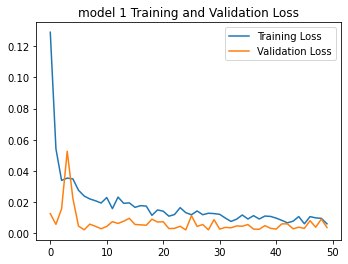

In [ ]:
#acc = train_model.history['accuracy']
#val_acc = train_model.history['val_accuracy']
import matplotlib.pyplot as plt
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('model 1 Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 115,841
Trainable params: 115,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import math
from sklearn.metrics import mean_squared_error

# make predictions
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)
# invert predictions
predict_train = scaler_views.inverse_transform(predict_train)
y_train = scaler_views.inverse_transform(y_train)
predict_test = scaler_views.inverse_transform(predict_test)
y_test= scaler_views.inverse_transform(y_test)
nsamples, nx, ny = x_test.shape
d2_x_test = x_test.reshape((nsamples,nx*ny))
x_test_rev = scaler_views.inverse_transform(d2_x_test)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(predict_train, y_train))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(predict_test, y_test))
print('Val Score: %.2f RMSE' % (valScore))
predict = scaler_views.inverse_transform(model.predict(x_test))
print ("the demo predict is %s" %(predict.astype('int')[10:20]))
print ("the demo train is %s" %(x_test_rev[10:20]))
print ("the demo true is %s" %(y_test.astype('int')[10:20]))
#print(y_test[0:50])

86/86 [==============================] - 0s 5ms/step
Train Score: 425729.33 RMSE
Val Score: 379593.89 RMSE
86/86 [==============================] - 0s 5ms/step
the demo predict is [[ 1102816]
 [ 1840520]
 [  445713]
 [  968614]
 [  542769]
 [ 2444943]
 [ 5857182]
 [ 5573454]
 [ 2084747]
 [13144133]]
the demo train is [[  519623.   766167.   835582.   902875.   937627.]
 [ 1382225.  1404916.  1564969.  1621845.  1681713.]
 [  172040.   208791.   222006.   228688.   234884.]
 [  402647.   560134.   645619.   732011.   784235.]
 [  206703.   292697.   323838.   343023.   345813.]
 [ 1336020.  1721129.  1959172.  2119100.  2270690.]
 [ 4755586.  5196441.  5443108.  5618107.  5702575.]
 [ 4230805.  4593334.  4928864.  5165405.  5346463.]
 [  939081.  1500943.  1771438.  1897154.  1963604.]
 [ 6370515.  7815386.  9638948. 10729015. 12139092.]]
the demo true is [[  951120]
 [ 1726825]
 [  237630]
 [  825176]
 [  347088]
 [ 2370577]
 [ 5753953]
 [ 5484760]
 [ 2009606]
 [13034795]]


In [ ]:
@anvil.server.callable
def view_performance(): 
    return trainScore,valScore,predict.astype('int')[0:10],x_test_rev.astype('int')[0:10], y_test.astype('int')[0:10]
    print('Train Score: %.2f RMSE' % (trainScore))
    print('Val Score: %.2f RMSE' % (valScore))
    print ("the demo predict is %s" %(predict.astype('int')[0:10]))
    print ("the demo train is %s" %(x_test_rev.astype('int')[0:10]))
    print ("the demo true is %s" %(y_test.astype('int')[0:10]))

In [ ]:
scaler_likes, US_likes = standardize(US2.likes.values.reshape(-1,1))
scaler_dislikes, US_dislikes = standardize(US2.dislikes.values.reshape(-1,1))
scaler_comment_count, US_comment_count = standardize(US2.comment_count.values.reshape(-1,1))

In [ ]:
mean_likes = scaler_likes.mean_
mean_dislikes = scaler_dislikes.mean_
mean_comment_count = scaler_comment_count.mean_
mean_likes = mean_likes[0]
mean_dislikes = mean_dislikes[0]
mean_comment_count = mean_comment_count[0]
var_likes = scaler_likes.var_
var_dislikes = scaler_dislikes.var_
var_comment_count = scaler_comment_count.var_
sd_likes = math.sqrt(var_likes)
sd_dislikes = math.sqrt(var_dislikes)
sd_comment_count = math.sqrt(var_comment_count)


In [ ]:
US4 = pd.DataFrame()
US4["trending_date1"] = US2["trending_date1"]
US4["video_id"] = US2["video_id"]
US4["views"] = US_views
US4["likes"] = US_likes
US4["dislikes"] = US_dislikes
US4["comment_count"] = US_comment_count

In [ ]:
US4

trending_date1     video_id     views     likes  dislikes  \
0          2020-08-12  3C66w5Z0ixs -0.220228 -0.052697  0.256145   
1          2020-08-12  49Z6Mv4_WCA -0.283607 -0.185746 -0.056860   
2          2020-08-12  nt3VVyv5pxQ -0.322016 -0.267606 -0.170544   
4          2020-08-12  gPdUslndvVI -0.356707 -0.280254 -0.187155   
22         2020-08-13  3C66w5Z0ixs -0.054414 -0.001831  0.542198   
...               ...          ...       ...       ...       ...   
170985     2022-04-26  F-kvFACZ5yE  0.273859 -0.217826 -0.202589   
170986     2022-04-27  F-kvFACZ5yE  0.274911 -0.217598 -0.202589   
170987     2022-04-29  F-kvFACZ5yE  0.276500 -0.217184 -0.202589   
170988     2022-04-30  F-kvFACZ5yE  0.277168 -0.217022 -0.202589   
170989     2022-05-04  F-kvFACZ5yE  0.279541 -0.216376 -0.202589   

        comment_count  
0            0.174429  
1           -0.085150  
2           -0.125564  
4           -0.116250  
22           0.230099  
...               ...  
170985       0.028818  
170986       0.028910  
170987       0.028947  
170988       0.028883  
170989       0.028653  

[94614 rows x 6 columns]

In [ ]:
x_four=[]
y_four=[]
for v in videos:
    row=[]
    temp_df = US3[US3["video_id"]==v].sort_values(by="trending_date1")
    
    seq = temp_df.views[0:5].index #first 5 views as input
    #print seq
    #print(seq)    
    for s in seq:
        #print (US3.iloc[s].values[2:])
        row.append(US4.iloc[s].values[2:])
    #print(row)
        
    x_four.append(row)
    nextstep = temp_df.views[5:6].values # the last views as output
    y_four.append(nextstep)

In [ ]:
x_four = np.reshape(x_four,(len(x_four),20,1)) # new
#print (x.shape)
y_four = np.reshape(y_four,(-1,1))
#print (y.shape)
x_four = x_four.astype('float64')
y_four = y_four.astype('float64')
#print(x_four)

In [ ]:
x_train_new,x_testall_new,y_train_new,y_testall_new = train_test_split(x_four,y_four,test_size=0.4,random_state=42)
x_val_new,x_test_new,y_val_new,y_test_new = train_test_split(x_testall_new,y_testall_new,test_size=0.5,random_state=42)

In [ ]:
model_new = Sequential()
model_new.add(LSTM(64, return_sequences=True,input_shape=(20, 1),activation='tanh'))
model_new.add(Dropout(0.2))
model_new.add(LSTM(128,return_sequences=False,activation='tanh'))
model_new.add(Dense(1, activation='linear'))#1 is output
#optimizer = RMSprop(lr=0.005)
optimizer = RMSprop(learning_rate=0.005)
model_new.compile(loss='mean_squared_error', optimizer=optimizer)
#from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='view_count5+like+dislike+comment_count_predict_view_count_future.hdf5', 
                               verbose=1, save_best_only=True)

train_model_new = model_new.fit(x_train_new, y_train_new, 
          validation_data=(x_val_new, y_val_new),
          epochs=50, batch_size=64, callbacks=[checkpointer], verbose=1)
model_new.load_weights('view_count5+like+dislike+comment_count_predict_view_count_future.hdf5')

Epoch 1/50
127/128 [============================>.] - ETA: 0s - loss: 0.3352
Epoch 1: val_loss improved from inf to 0.12158, saving model to view_count5+like+dislike+comment_count_predict_view_count_future.hdf5
128/128 [==============================] - 12s 61ms/step - loss: 0.3357 - val_loss: 0.1216
Epoch 2/50
128/128 [==============================] - ETA: 0s - loss: 0.1467
Epoch 2: val_loss improved from 0.12158 to 0.08073, saving model to view_count5+like+dislike+comment_count_predict_view_count_future.hdf5
128/128 [==============================] - 7s 55ms/step - loss: 0.1467 - val_loss: 0.0807
Epoch 3/50
127/128 [============================>.] - ETA: 0s - loss: 0.1004
Epoch 3: val_loss improved from 0.08073 to 0.02716, saving model to view_count5+like+dislike+comment_count_predict_view_count_future.hdf5
128/128 [==============================] - 7s 55ms/step - loss: 0.0999 - val_loss: 0.0272
Epoch 4/50
128/128 [==============================] - ETA: 0s - loss: 0.0704
Epoch 4: va

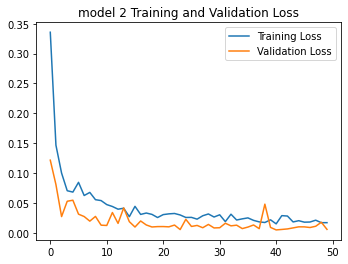

In [ ]:
loss_new = train_model_new.history['loss']
val_loss_new = train_model_new.history['val_loss']

epochs_range = range(len(loss_new))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_new, label='Training Loss')
plt.plot(epochs_range, val_loss_new, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('model 2 Training and Validation Loss')
plt.show()

In [ ]:
def transfer_x_test(x_test_new): 
    y_test_new = x_test_new[0:10]
    #print(y_test_new)
    y_test_view=[]
    y_test_like=[]
    y_test_dislike=[]
    y_test_comment=[]
    for j in range(0,10): 
        for i in range(0,20,4):
            y_test_view.append(y_test_new[j][i][0])
        #print(y_test_view)
        for i in range(1,20,4):
            y_test_like.append(y_test_new[j][i][0])
        for i in range(2,20,4):
            y_test_dislike.append(y_test_new[j][i][0])
        for i in range(3,20,4):
            y_test_comment.append(y_test_new[j][i][0])
    return y_test_view, y_test_like,  y_test_dislike,y_test_comment

In [ ]:
# make predictions
predict_train_new  = model_new.predict(x_train_new)
predict_test_new  = model_new.predict(x_test_new)
# invert predictions
predict_train_new  = scaler_views.inverse_transform(predict_train_new)
y_train_new  = scaler_views.inverse_transform(y_train_new)
predict_test_new  = scaler_views.inverse_transform(predict_test_new)
y_test_new = scaler_views.inverse_transform(y_test_new)
# calculate root mean squared error
#x_test_new_view_rev = scaler_views.inverse_transform(x_test_new)[view,like,dislike,comment_count]
#
view_new, like_new, dislike_new, comment_count_new = transfer_x_test(x_test_new)
#print(dislike_new)
# reverse 
view_new = np.reshape(view_new,(int(len(view_new)/5),5))
view_new = scaler_views.inverse_transform(view_new)
#print(view_new)
like_new = np.reshape(like_new,(int(len(like_new)/5),5))
like_new = scaler_likes.inverse_transform(like_new)

dislike_new  = np.reshape(dislike_new ,(int(len(dislike_new )/5),5))
dislike_new = scaler_dislikes.inverse_transform(dislike_new)

comment_count_new = np.reshape(comment_count_new,(int(len(comment_count_new)/5),5))
comment_count_new = scaler_comment_count.inverse_transform(comment_count_new)
#print(dislike_new)
#print(view_new)

trainScore_new = math.sqrt(mean_squared_error(predict_train_new , y_train_new))
print('Train Score: %.2f RMSE' % (trainScore_new))
valScore_new = math.sqrt(mean_squared_error(predict_test_new , y_test_new))
print('Val Score: %.2f RMSE' % (valScore_new))
predict_new = scaler_views.inverse_transform(model_new .predict(x_test_new))
print ("the demo predict is %s" %(predict_new.astype('int')[0:5]))
#print ("the demo train is %s" %(x_test_new_rev[0:10]))
#print ("the demo true is %s" %(y_test_new .astype('int')[0:5]))
print ("the training view %s"%(view_new .astype('int')[0:5]))
#print ("the training like %s"%(like_new .astype('int')[0:5]))
#print ("the training dislike %s"%(dislike_new .astype('int')[0:5]))
#print ("the training comment %s"%(comment_count_new .astype('int')[0:5]))

86/86 [==============================] - 1s 14ms/step
Train Score: 719839.40 RMSE
Val Score: 440063.19 RMSE
86/86 [==============================] - 1s 15ms/step
the demo predict is [[ 696028]
 [ 875893]
 [1121110]
 [2366835]
 [ 619444]]
the training view [[ 337992  607512  675045  714087  741687]
 [ 276047  508829  660641  780960  887037]
 [ 579895  810473  919809 1021239 1147364]
 [1435604 1821742 2075277 2231244 2357817]
 [ 307630  515174  617406  662177  696249]]


In [ ]:
@anvil.server.callable
def plus_view_performance(): 
    return trainScore_new,valScore_new,predict_new.astype('int')[0:5], y_test_new.astype('int')[0:5],view_new .astype('int')[0:5],like_new.astype('int')[0:5], dislike_new.astype('int')[0:5], comment_count_new .astype('int')[0:5] 
    

In [ ]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 64)            16896     
                                                                 
 dropout_1 (Dropout)         (None, 20, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 115,841
Trainable params: 115,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
@anvil.server.callable
def predict_fifth_day_by_view_count(input_day_1,input_day_2,input_day_3,input_day_4,input_day_5): 
    #print(input_day_1)
    #print(type(input_day_1))
    data = []
    #need to standardlized first
    #ddd = (input_day_1-mean_view)/sqr_view #ddd is an array???????
    data.append([(input_day_1-mean_view)/sqr_view])
    data.append([(input_day_2-mean_view)/sqr_view])
    data.append([(input_day_3-mean_view)/sqr_view])
    data.append([(input_day_4-mean_view)/sqr_view])
    data.append([(input_day_5-mean_view)/sqr_view])
    #data.append([d6])
    print("this is sd data.")
    print(data)
    predict_data = model.predict([data])
    print("this is sd predict data")
    print(predict_data)
    predict_data = (predict_data*sqr_view)+mean_view
    return predict_data.astype('int')

In [ ]:
#(input_day_1-mean_view)/sqr_view     ++ mean_likes, mean_dislikes, mean_comment_count, sd_likes,sd_dislikes,sd_comment_count
# view, like,dislike,coumment_count
@anvil.server.callable
def predict_fifth_day_by_view_count_plus_others(a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,c1,c2,c3,c4,c5,d1,d2,d3,d4,d5): 
    data1 = [(a1-mean_view)/sqr_view],[(b1-mean_likes)/sd_likes],[(c1-mean_dislikes)/sd_dislikes],[(d1-mean_comment_count)/sd_comment_count]
    data2 = [(a2-mean_view)/sqr_view],[(b2-mean_likes)/sd_likes],[(c2-mean_dislikes)/sd_dislikes],[(d2-mean_comment_count)/sd_comment_count]
    data3 = [(a3-mean_view)/sqr_view],[(b3-mean_likes)/sd_likes],[(c3-mean_dislikes)/sd_dislikes],[(d3-mean_comment_count)/sd_comment_count]
    data4 = [(a4-mean_view)/sqr_view],[(b4-mean_likes)/sd_likes],[(c4-mean_dislikes)/sd_dislikes],[(d4-mean_comment_count)/sd_comment_count]
    data5 = [(a5-mean_view)/sqr_view],[(b5-mean_likes)/sd_likes],[(c5-mean_dislikes)/sd_dislikes],[(d5-mean_comment_count)/sd_comment_count]
    input_data = []
    for i in range(0,4):
        input_data.append(data1[i])
    for i in range(0,4):
        input_data.append(data2[i])
    for i in range(0,4):
        input_data.append(data3[i])
    for i in range(0,4):
        input_data.append(data4[i])
    for i in range(0,4):
        input_data.append(data5[i])
    print(input_data)
    predict_data = model_new.predict([input_data])
    print(predict_data)
    predict_data = (predict_data*sqr_view)+mean_view
    return predict_data